## 1) Delivery_time -> Predict delivery time using sorting time 

In [10]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
delivery_df=pd.read_csv('delivery_time.csv')
delivery_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
delivery_df.shape

(21, 2)

In [4]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
delivery_df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

Text(0.5, 1.0, 'Sorting time')

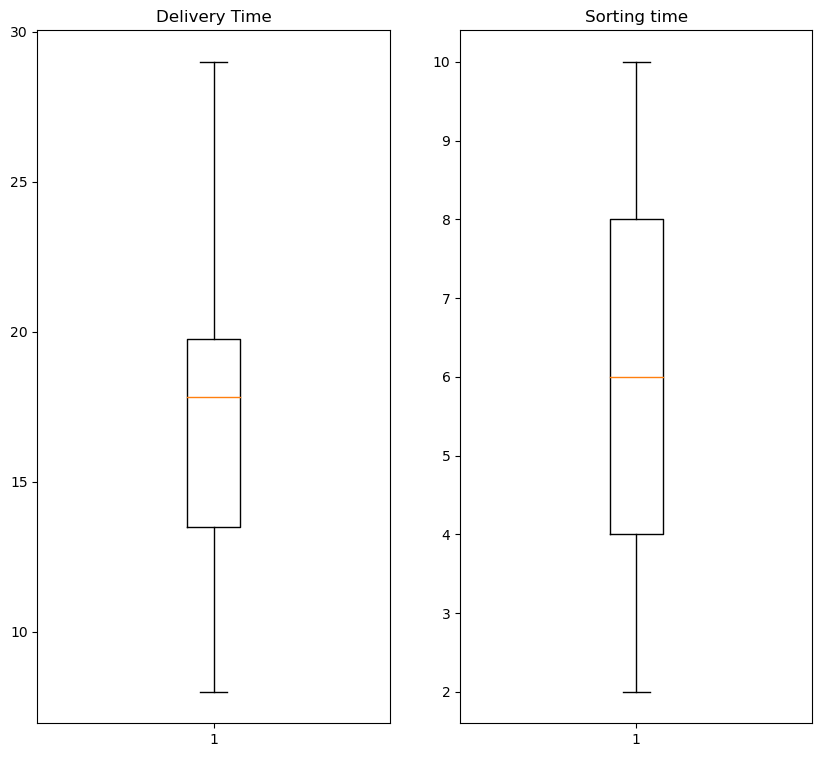

In [6]:
# checking outliers
plt.figure(figsize=(10,9))
plt.subplot(121)
plt.boxplot(delivery_df[['Delivery Time']])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(delivery_df[['Sorting Time']])
plt.title('Sorting time')

### feature engineering

### Trying different transformation of data to estimate normal distribution and to remove any skewness

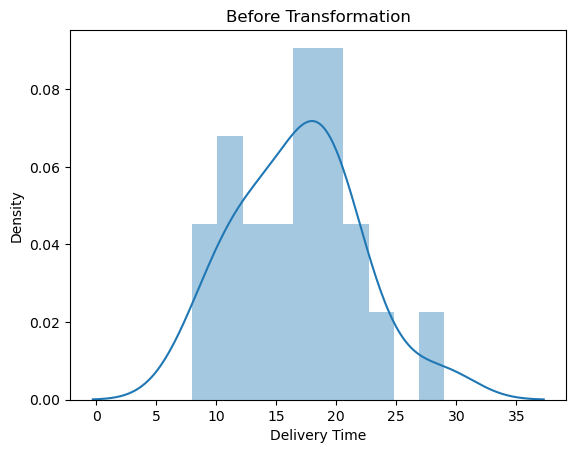

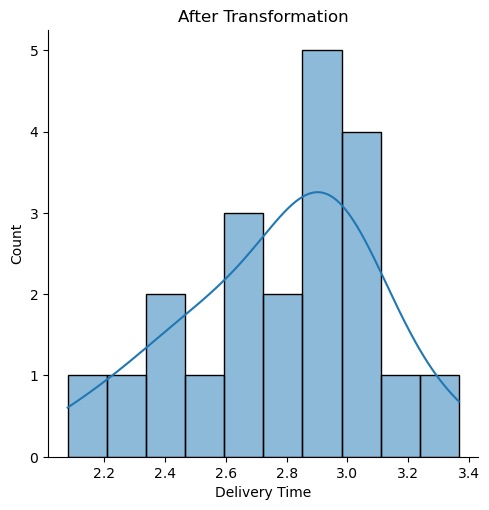

In [7]:
sns.distplot(delivery_df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(delivery_df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

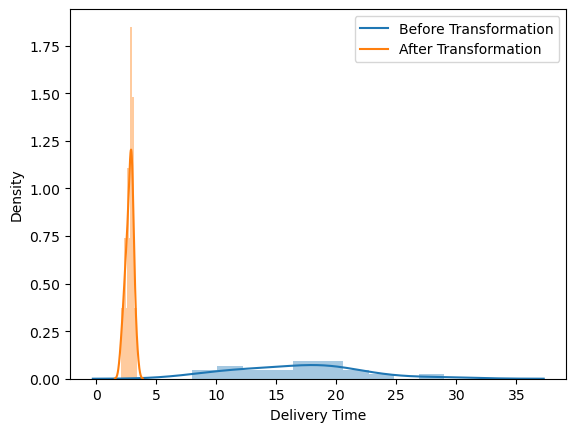

In [8]:
labels = ['Before Transformation','After Transformation']
sns.distplot(delivery_df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(delivery_df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

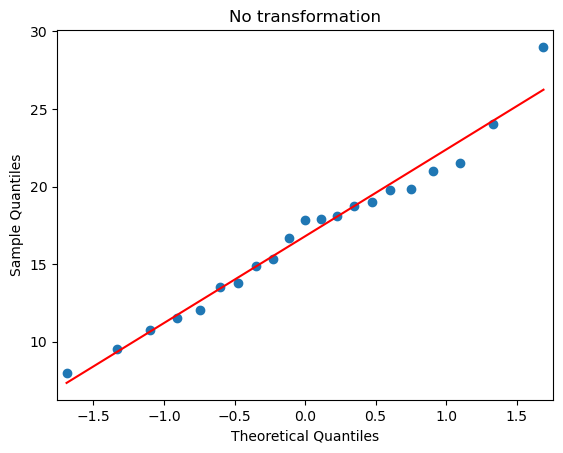

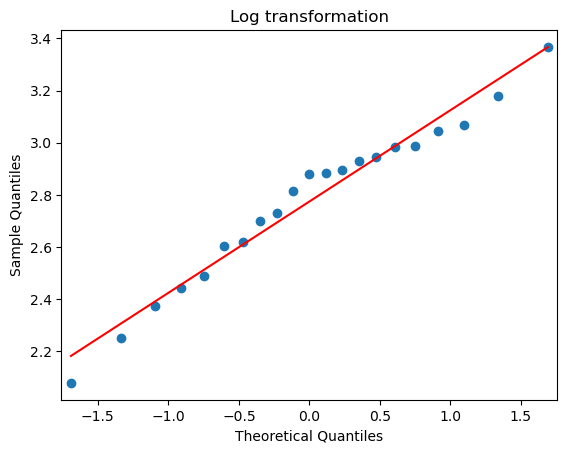

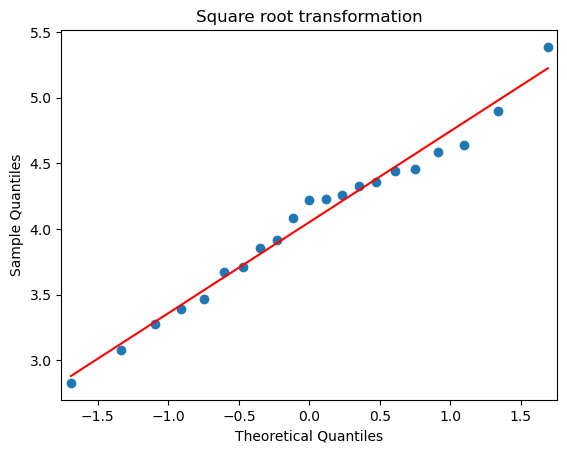

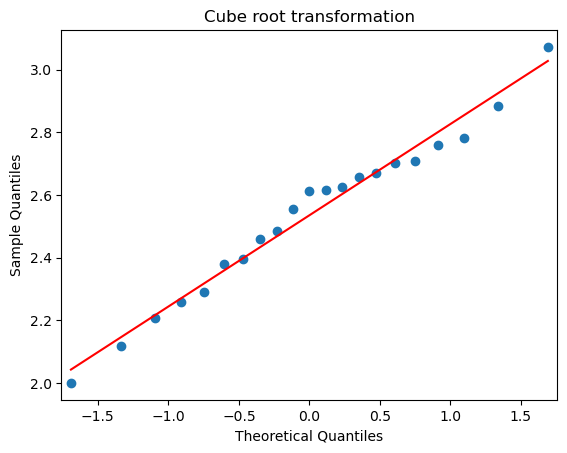

In [11]:
smf.qqplot(delivery_df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(delivery_df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(delivery_df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(delivery_df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

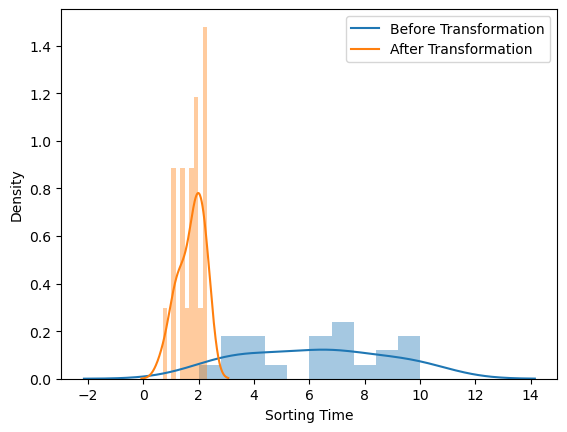

In [12]:
labels = ['Before Transformation','After Transformation']
sns.distplot(delivery_df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(delivery_df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

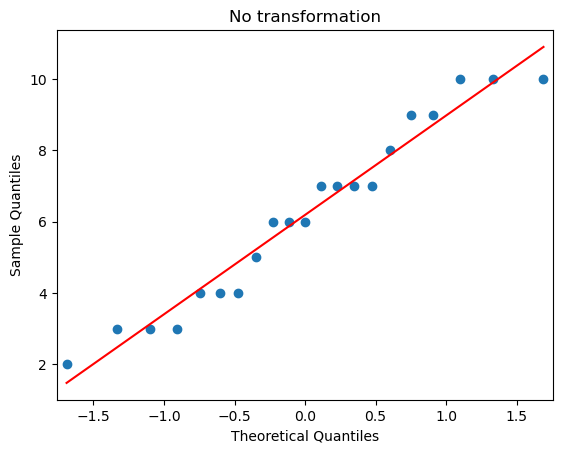

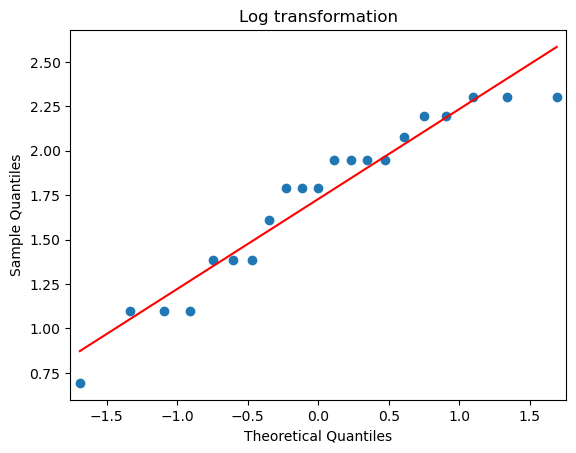

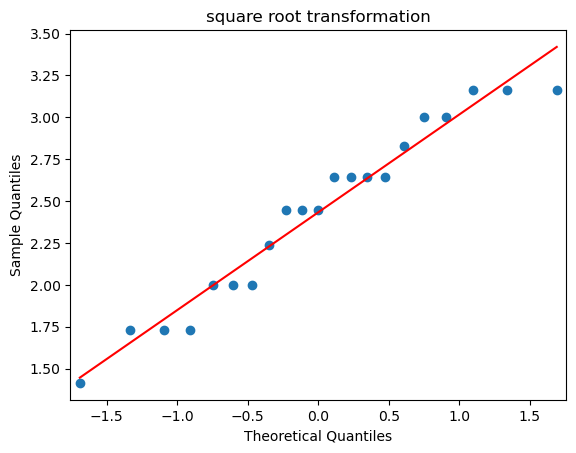

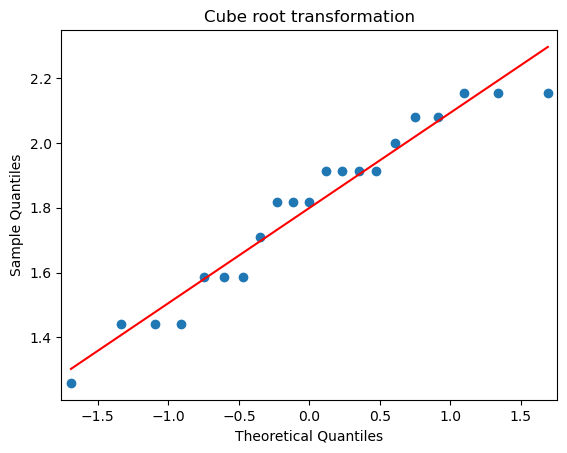

In [13]:
smf.qqplot(delivery_df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(delivery_df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(delivery_df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(delivery_df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

#### We only Perform any data transformation when the data is skewed or not normal

In [15]:
# target
target=delivery_df[['Delivery Time']]
target.head()

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00


In [16]:
# feature
feature=delivery_df[['Sorting Time']]
feature.head()

,Sorting Time
0,10
1,4
2,6
3,9
4,10


In [17]:
# splitting data into x_train,y_train,x_test,y_test
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=20)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 1)
(6, 1)
(15, 1)
(6, 1)


In [19]:
# model selection and assigning
lin_model=LinearRegression()

In [20]:
# training the model
lin_model.fit(x_train,y_train)

LinearRegression()

In [21]:
# predicting y_pred data using x_test
y_pred=lin_model.predict(x_test)
y_pred

array([[16.56826979],
       [17.89975806],
       [11.24231672],
       [21.89422287],
       [13.90529326],
       [17.89975806]])

In [22]:
y_test

,Delivery Time
16,13.75
19,17.83
18,8.00
4,29.00
1,13.50
12,16.68


In [26]:
pred=lin_model.predict(feature)

In [27]:
delivery_df['predicted_delivery_time']=pd.DataFrame(pred)
delivery_df

,Delivery Time,Sorting Time,predicted_delivery_time
0,21.00,10,21.894223
1,13.50,4,13.905293
2,19.75,6,16.568270
3,24.00,9,20.562735
4,29.00,10,21.894223
5,15.35,6,16.568270
6,19.00,7,17.899758
7,9.50,3,12.573805
8,17.90,10,21.894223
9,18.75,9,20.562735


In [168]:
# error(how much the data varied from actual value to predicted value)
error=y_test-y_pred
error

,Delivery Time
16,-2.818270
19,-0.069758
18,-3.242317
4,7.105777
1,-0.405293
12,-1.219758


Text(0.5, 1.0, 'Simple Linear Regression')

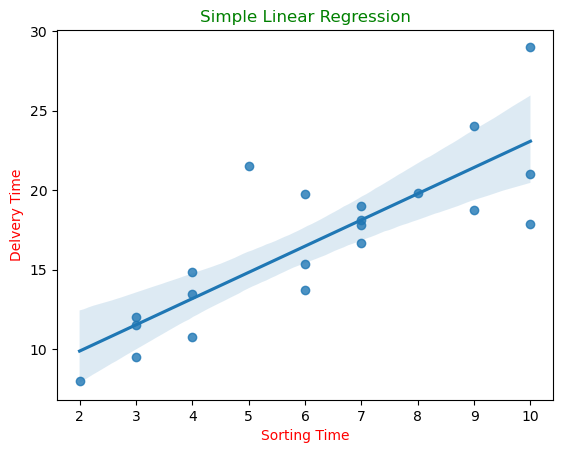

In [174]:
# regression plot
sns.regplot(x=delivery_df['Sorting Time'],y=delivery_df['Delivery Time'])
plt.xlabel('Sorting Time',color='red',size=10)
plt.ylabel('Delvery Time',color='red',size=10)
plt.title('Simple Linear Regression',color='green')

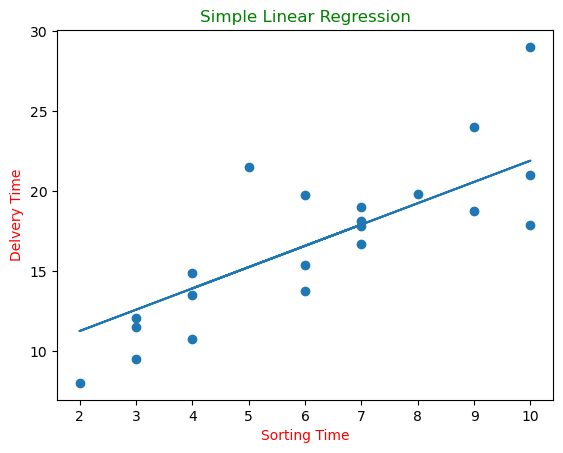

In [175]:
# predicted plotting
plt.scatter(delivery_df['Sorting Time'],delivery_df['Delivery Time'])
plt.xlabel('Sorting Time',color='red',size=10)
plt.ylabel('Delvery Time',color='red',size=10)
plt.title('Simple Linear Regression',color='green')
plt.plot(x_test,y_pred)

## 2) Salary_hike -> Build a prediction model for Salary_hike

In [39]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

In [29]:
salary_df=pd.read_csv('Salary_Data.csv')
salary_df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
salary_df.shape

(30, 2)

In [31]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [32]:
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [34]:
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


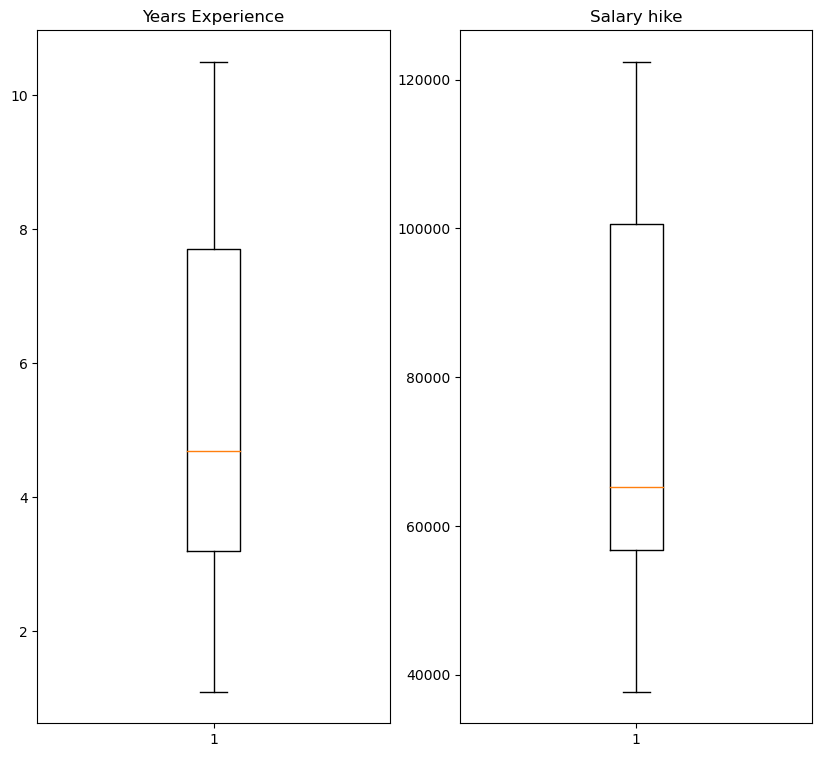

In [181]:
plt.figure(figsize=(10,9))
plt.subplot(121)
plt.boxplot(salary_df[['YearsExperience']])
plt.title('Years Experience')
plt.subplot(122)
plt.boxplot(salary_df[['Salary']])
plt.title('Salary hike')
plt.show()

### feature engineering

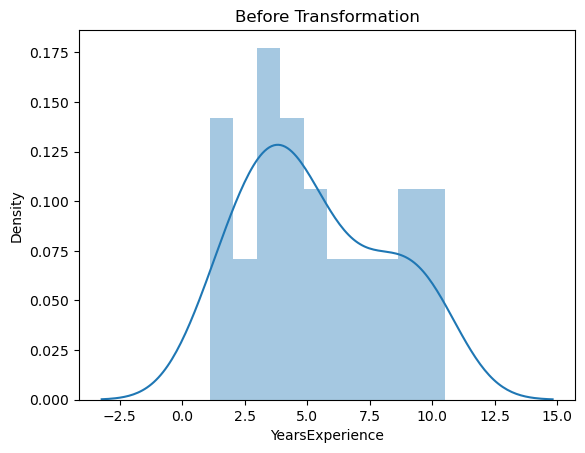

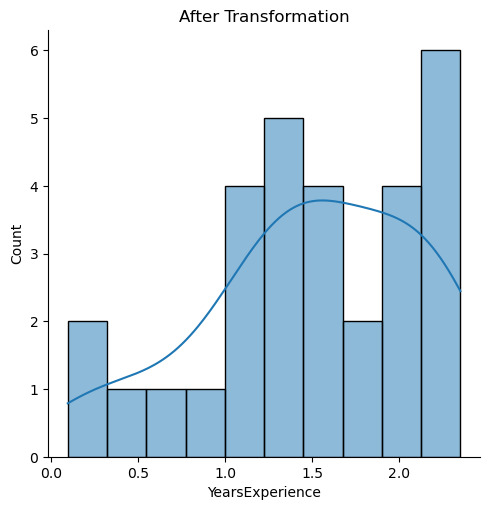

In [36]:
sns.distplot(salary_df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(salary_df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

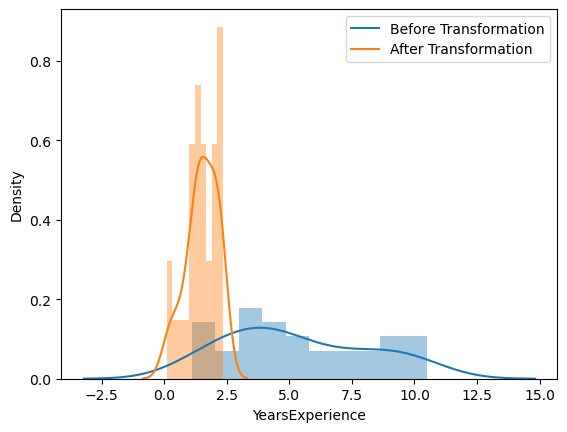

In [38]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary_df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(salary_df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

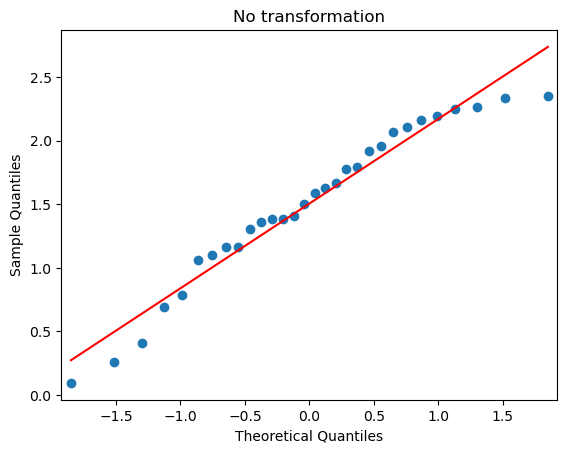

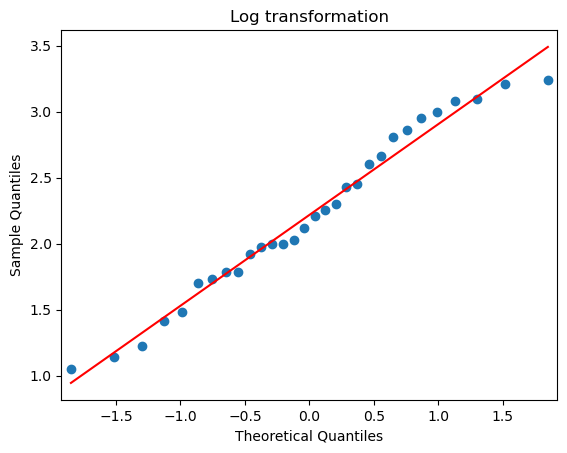

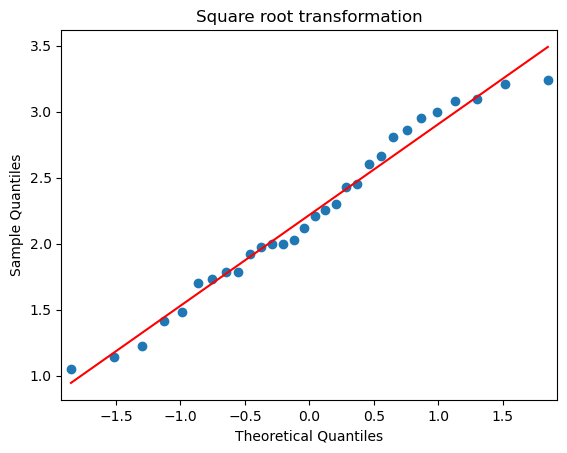

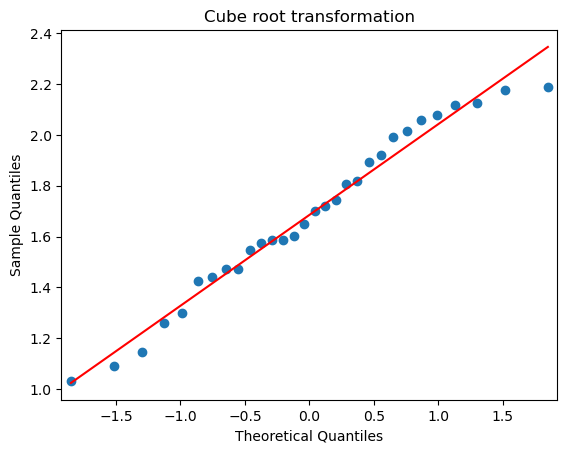

In [40]:
smf.qqplot(np.log(salary_df['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(salary_df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(salary_df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(salary_df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

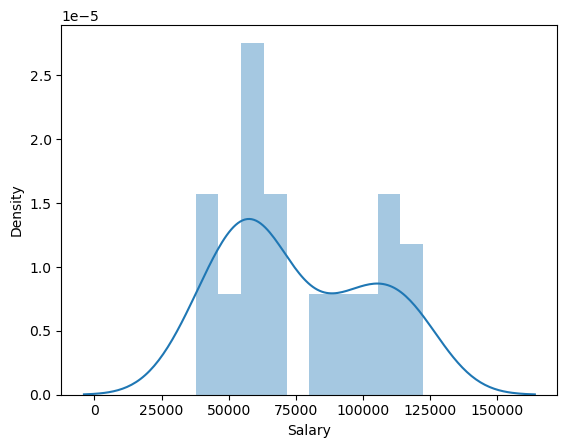

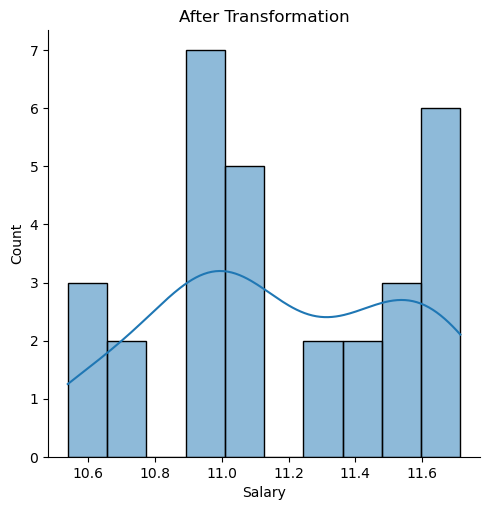

In [41]:
labels = ['Before Transformation','After Transformation']
sns.distplot(salary_df['Salary'], bins = 10, kde = True)
sns.displot(np.log(salary_df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

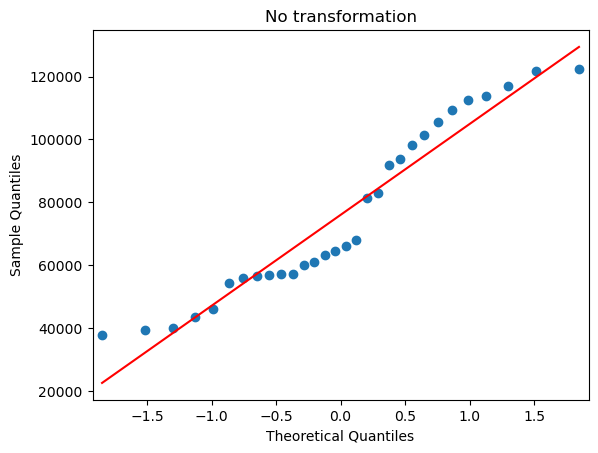

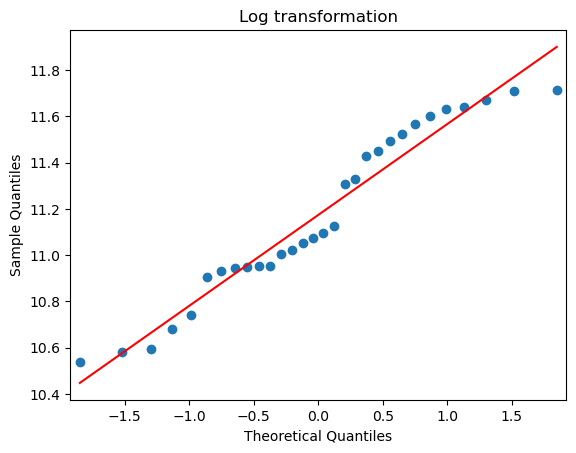

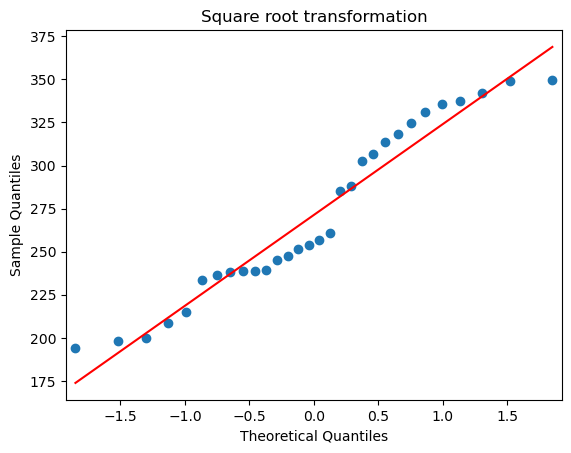

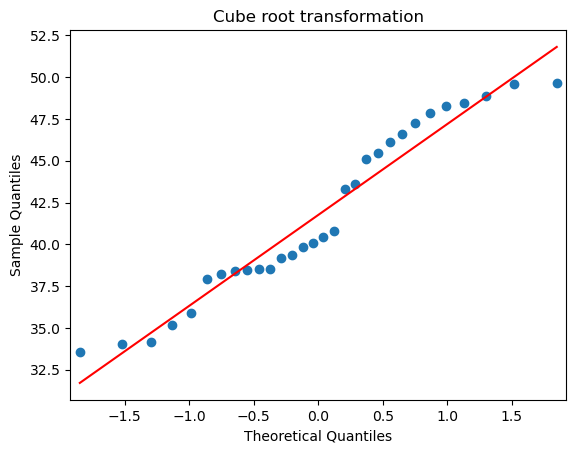

In [45]:
smf.qqplot(salary_df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(salary_df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(salary_df['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(salary_df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

#### NOTE:We only Perform any data transformation when the data is skewed or not normal distribution N(0,1)

In [182]:
# target
target=salary_df[['Salary']]
target.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [183]:
# feature
feature=salary_df[['YearsExperience']]
feature.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [184]:
# splitting data into x_train,y_train,x_test,y_test
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.75,random_state=20)

In [185]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 1)
(8, 1)
(22, 1)
(8, 1)


In [186]:
# model selection and assigning
lin_model=LinearRegression()

In [187]:
# training the model
lin_model.fit(x_train,y_train)

LinearRegression()

In [188]:
# predicting y_pred using x_test
y_pred=lin_model.predict(x_test)
y_pred

array([[ 65197.22619906],
       [ 46915.4520157 ],
       [ 38255.66424464],
       [ 63272.82891661],
       [126777.93923776],
       [ 64235.02755783],
       [ 82516.8017412 ],
       [118118.15146669]])

In [189]:
y_test

,Salary
13,57081.0
4,39891.0
1,46205.0
10,63218.0
29,121872.0
12,56957.0
18,81363.0
27,112635.0


In [190]:
error=y_test-y_pred
error

,Salary
13,-8116.226199
4,-7024.452016
1,7949.335755
10,-54.828917
29,-4905.939238
12,-7278.027558
18,-1153.801741
27,-5483.151467


In [47]:
pred=lin_model.predict(feature)

In [49]:
salary_df['Salary_hike']=pd.DataFrame(pred)
salary_df.head()

,YearsExperience,Salary,Salary_hike
0,1.1,39343.0,21.894223
1,1.3,46205.0,13.905293
2,1.5,37731.0,16.568270
3,2.0,43525.0,20.562735
4,2.2,39891.0,21.894223


Text(0.5, 1.0, 'Simple Linear Regression')

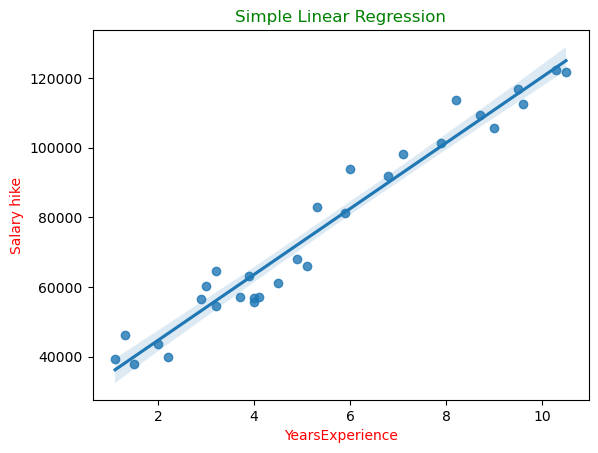

In [194]:
# plotting simple linear regression
sns.regplot(x=salary_df['YearsExperience'],y=salary_df['Salary'])
plt.xlabel('YearsExperience',color='red',size=10)
plt.ylabel('Salary hike',color='red',size=10)
plt.title('Simple Linear Regression',color='green')

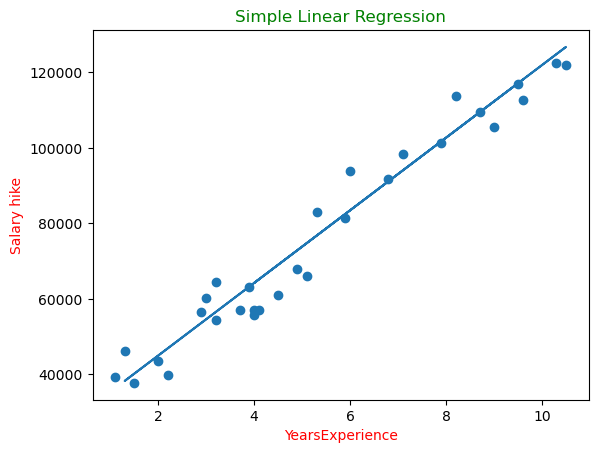

In [193]:
# plotting simple linear regression
plt.scatter(salary_df['YearsExperience'],salary_df['Salary'])
plt.xlabel('YearsExperience',color='red',size=10)
plt.ylabel('Salary hike',color='red',size=10)
plt.title('Simple Linear Regression',color='green')
plt.plot(x_test,y_pred)